# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711515s

## ZAPOSLENE OSEBE PO VIŠINI NETO PLAČE PO DEJAVNOSTIH IN SPOLU

In [1]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
neto_placa = pd.read_csv("../../podatki/placa/neto_placa.csv", sep = ";")

# V naši podatkovni zbirki vrednost 'z' in '-' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
neto_placa.iloc[:, 3:] = neto_placa.iloc[:, 3:].replace('z', pd.np.nan)
neto_placa.iloc[:, 3:] = neto_placa.iloc[:, 3:].replace('-', pd.np.nan)

# Pretvorimo imena stolpcev v velike črke
neto_placa.columns = neto_placa.columns.str.upper()

# Pretvorimo vrstice v velike črke
neto_placa['SKD DEJAVNOST'] = neto_placa['SKD DEJAVNOST'].apply(lambda x: x.upper())
neto_placa['SPOL'] = neto_placa['SPOL'].apply(lambda x: x.upper())
neto_placa['STATUS ZAPOSLITVE'] = neto_placa['STATUS ZAPOSLITVE'].apply(lambda x: x.upper())

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
neto_placa.iloc[:, 4:] = imputer.fit_transform(neto_placa.iloc[:, 4:])

# Prve tri stolpce pretvorimo v 'STRING'
neto_placa.iloc[:, 0:3] = neto_placa.iloc[:, 0:3].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
neto_placa.iloc[:, 4:] = neto_placa.iloc[:, 4:].astype(int)

C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17544\939518469.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  neto_placa.iloc[:, 4:] = imputer.fit_transform(neto_placa.iloc[:, 4:])
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17544\939518469.py:40: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  neto_placa.iloc[:, 4:] = neto_placa.iloc[:, 4:].astype(int)


In [18]:
# Shranimo v .xlsx datoteko
#neto_placa.to_excel('neto_placa.xlsx', index=False)

In [20]:
# Pregled vseh stolpcev
print(neto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


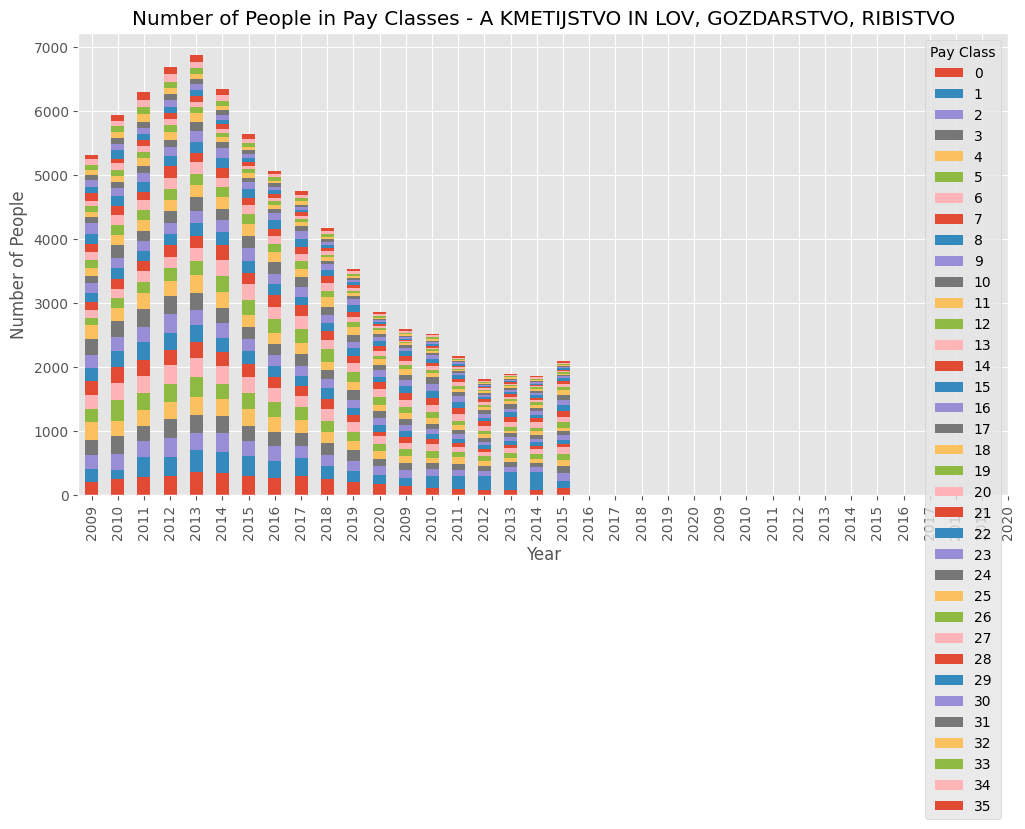

In [69]:
import matplotlib.pyplot as plt

# Filter data for the specific activity
activity_data = neto_placa[neto_placa['SKD DEJAVNOST'] == 'A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO']

# Select columns representing the pay classes
pay_classes = activity_data.columns[6:]

# Transpose the data for plotting
activity_data_transposed = activity_data[pay_classes].T

# Set plot style
plt.style.use('ggplot')

# Create a stacked bar plot
activity_data_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of People in Pay Classes - A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO')

# Customize the x-axis tick labels to display years in the format "2009"
years = activity_data['LETO'].apply(lambda x: str(x)[:4])
plt.xticks(range(len(years)), years)

# Show the legend
plt.legend(title='Pay Class')

# Display the plot
plt.show()

---

# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711510s

## ZAPOSLENE OSEBE PO VIŠINI BRUTO PLAČE PO DEJAVNOSTIH IN SPOLU

In [4]:
# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
bruto_placa = pd.read_csv("../../podatki/placa/bruto_placa.csv", sep = ";")

# V naši podatkovni zbirki vrednost 'z' in '-' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('z', pd.np.nan)
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('-', pd.np.nan)

# Pretvorimo imena stolpcev v velike črke
bruto_placa.columns = bruto_placa.columns.str.upper()

# Pretvorimo vrstice v velike črke
bruto_placa['SKD DEJAVNOST'] = bruto_placa['SKD DEJAVNOST'].apply(lambda x: x.upper())
bruto_placa['SPOL'] = bruto_placa['SPOL'].apply(lambda x: x.upper())
bruto_placa['STATUS ZAPOSLITVE'] = bruto_placa['STATUS ZAPOSLITVE'].apply(lambda x: x.upper())

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
bruto_placa.iloc[:, 4:] = imputer.fit_transform(bruto_placa.iloc[:, 4:])

# Prve tri stolpce pretvorimo v 'STRING'
bruto_placa.iloc[:, 0:3] = bruto_placa.iloc[:, 0:3].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
bruto_placa.iloc[:, 4:] = bruto_placa.iloc[:, 4:].astype(int)

In [5]:
# Shranimo v .xlsx datoteko
# bruto_placa.to_excel('bruto_placa.xlsx', index=False)

In [6]:
# Pregled vseh stolpcev
print(bruto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


---